# Yield prediction


## Introducere

## Import-uri

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Citirea fisierului Csv care contine baza de date 

In [51]:
df=pd.read_csv("crop_yield.csv")
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


## Afisarea coloanelor lipsa si valorilor Null si NaN

In [52]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare]
Index: []


## Verificare randuri duplicate

In [53]:

duplicate_rows = df[df.duplicated()]
duplicate_rows

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare


## Descrierea Bazei de date

In [54]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


## Histograma datelor agricole

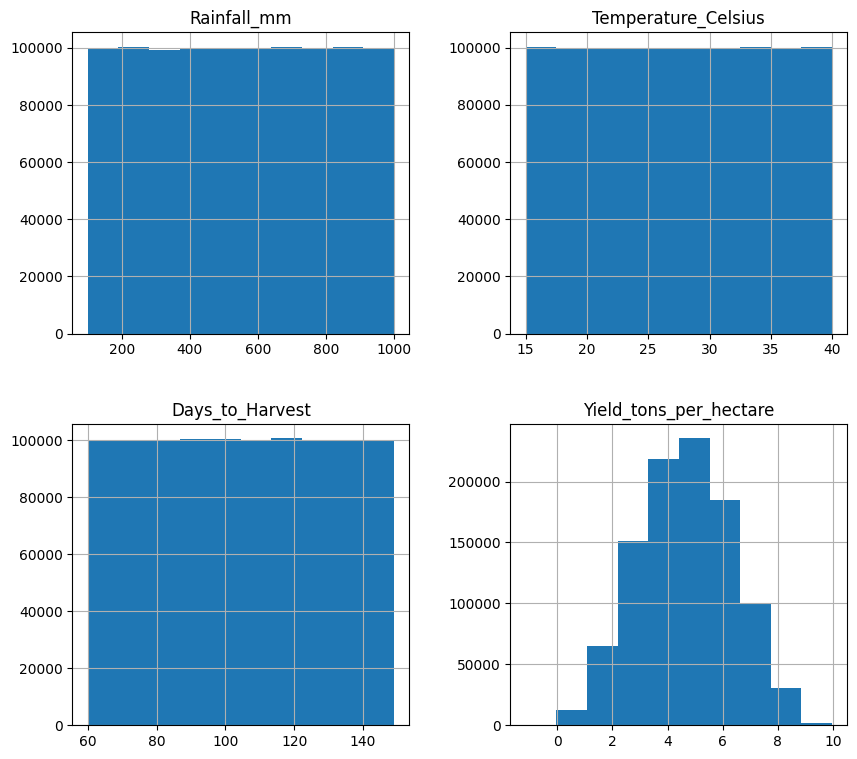

In [55]:
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

## Matricea de corelatie 

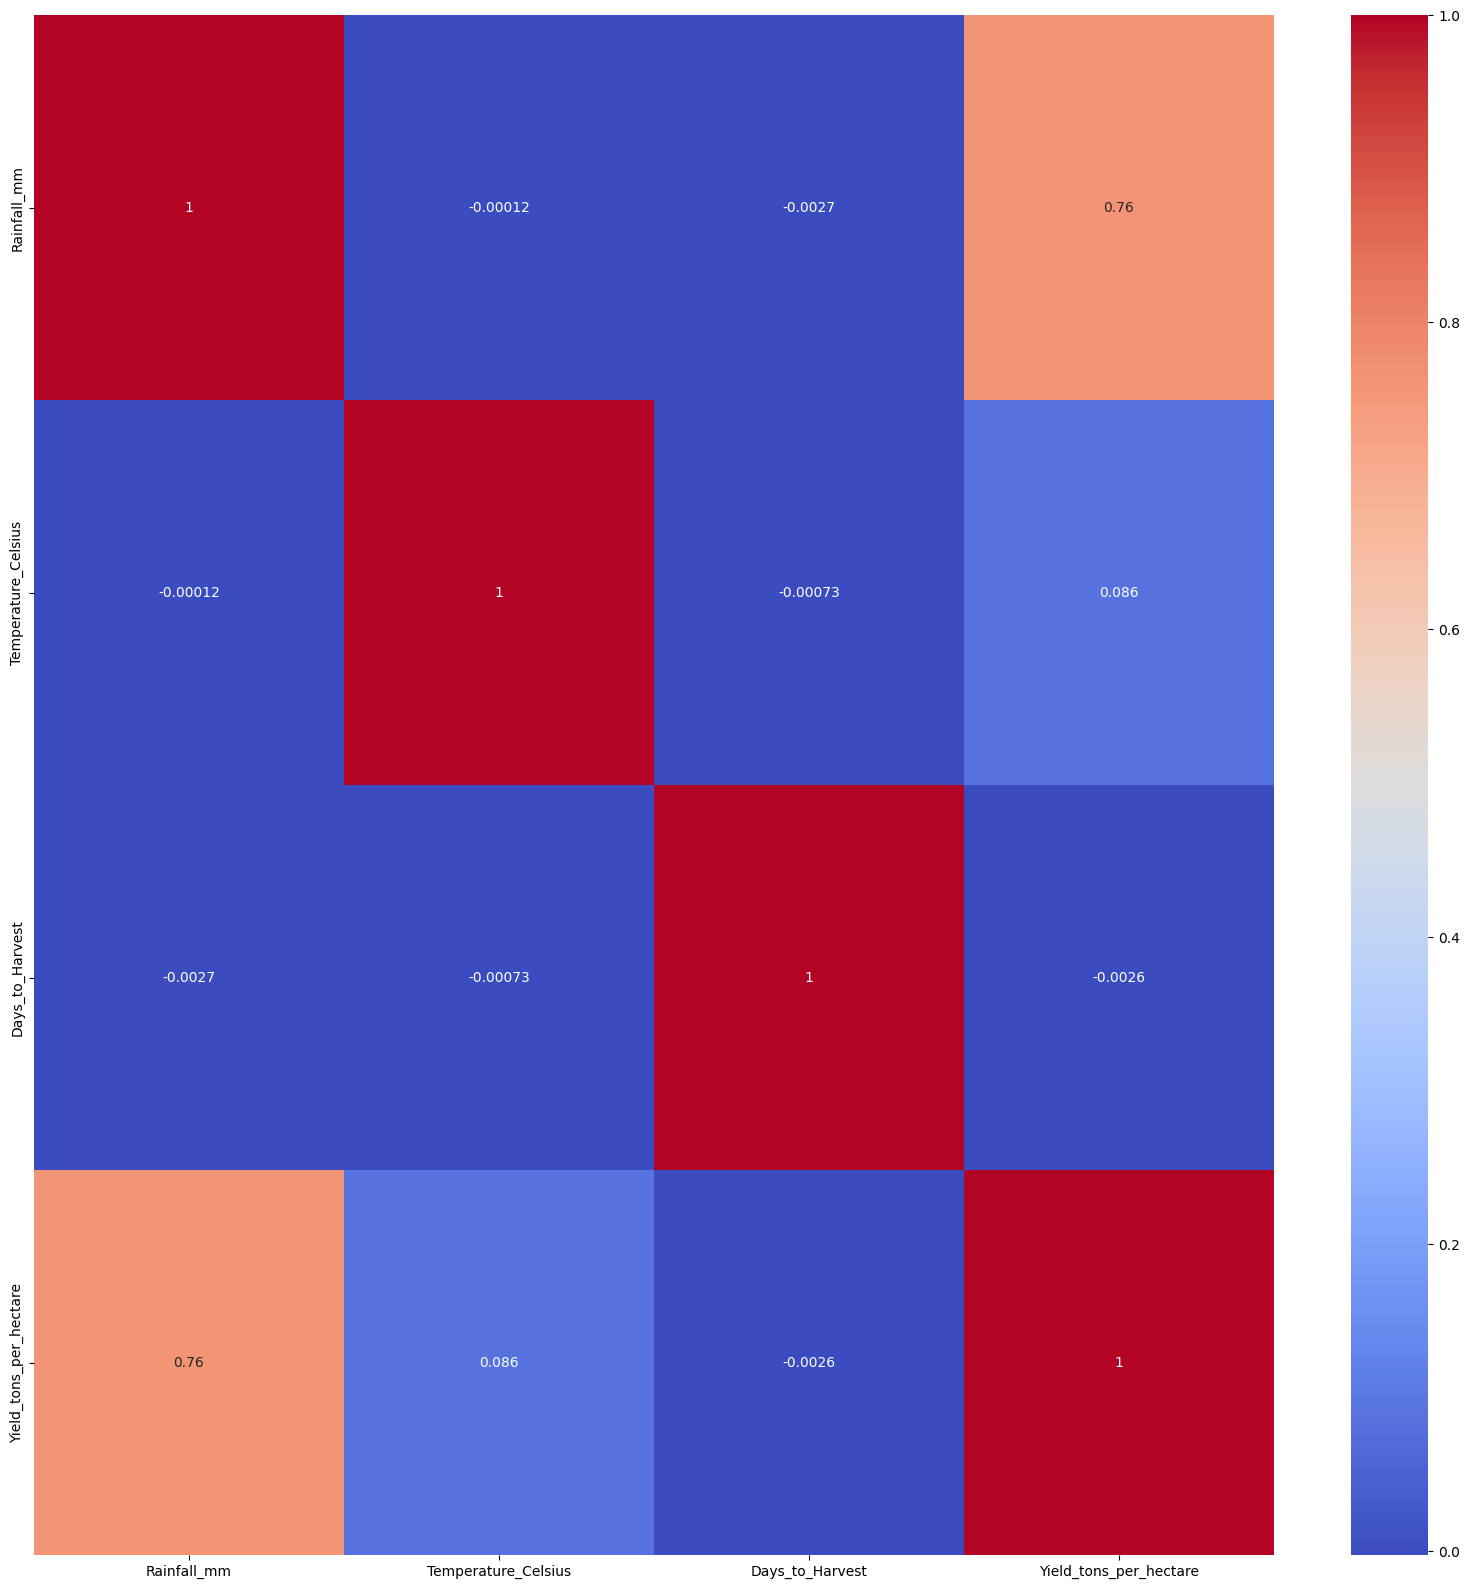

In [56]:
numeric_df = df.select_dtypes(include=[np.number])

correlation = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

## Indicele Gini penrtru productia agricola 

Gini Index for Rainfall_mm: 0.2727819149468251


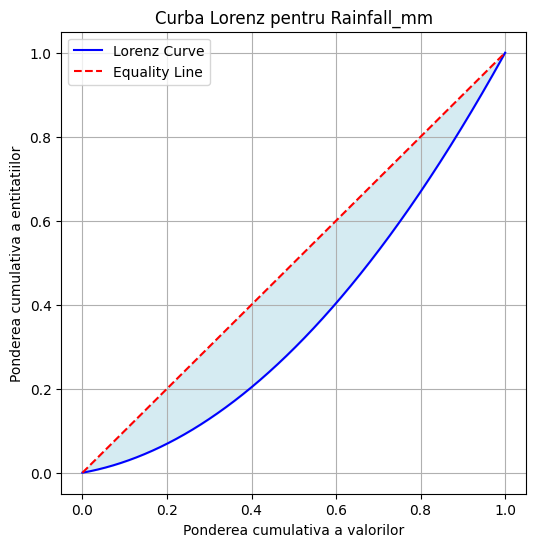

Gini Index for Temperature_Celsius: 0.15156598060381202


C:\Users\Gavris Nicu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


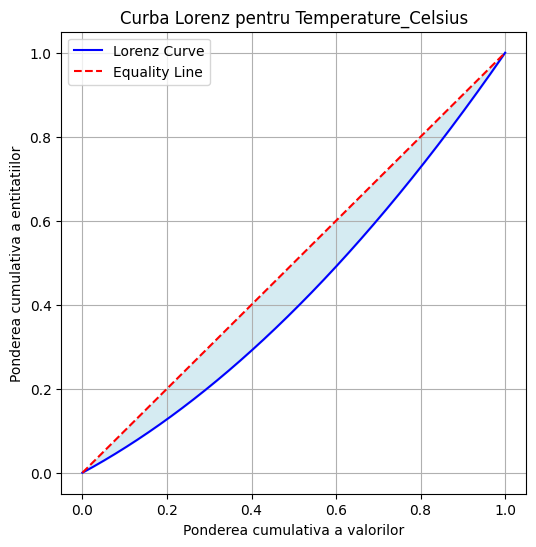

Gini Index for Days_to_Harvest: 0.14338741116363196


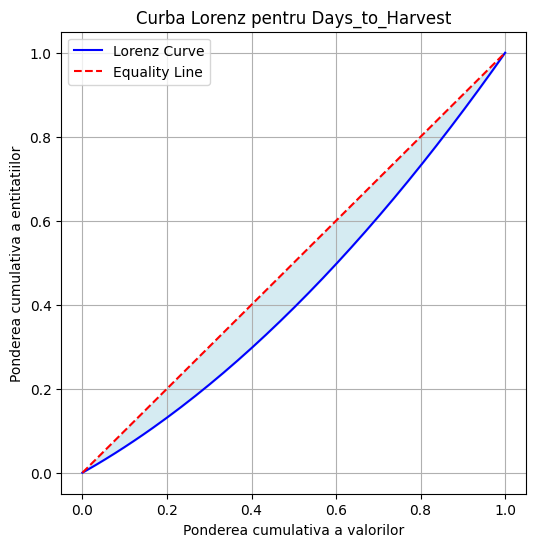

Gini Index for Yield_tons_per_hectare: 0.20826535383332528


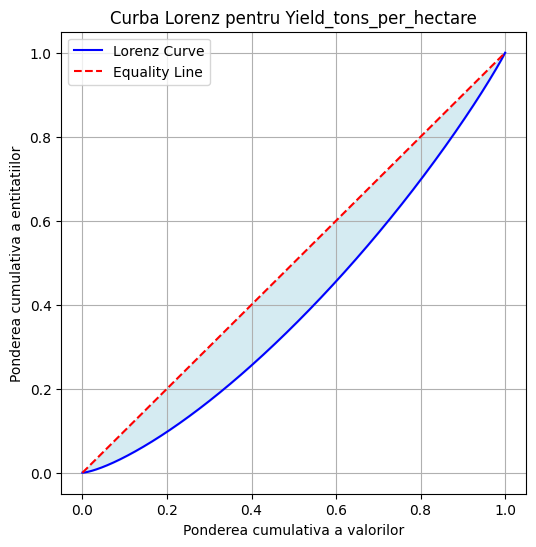

In [57]:


def gini_index(values):
    """
    Calculate the Gini index for a list or numpy array of values.
    """
    values = np.array(values)
    if values.ndim != 1:
        raise ValueError("Input values must be a 1-dimensional array.")
    
    # Sort values in ascending order
    sorted_values = np.sort(values)
    n = len(values)
    
    # Calculate Gini index
    cumulative_values = np.cumsum(sorted_values)
    gini = (2 * np.sum((np.arange(1, n + 1) * sorted_values)) - (n + 1) * cumulative_values[-1]) / (n * cumulative_values[-1])
    return gini

def plot_lorenz_curve(values, column_name):
    """
    Plot the Lorenz curve for a given list of values.
    """
    values = np.array(values)
    sorted_values = np.sort(values)
    cumulative_values = np.cumsum(sorted_values)
    cumulative_values = np.insert(cumulative_values, 0, 0)  # Add 0 at the beginning
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalize
    
    # Plot Lorenz curve
    plt.figure(figsize=(6, 6))
    plt.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label="Lorenz Curve", color="blue")
    plt.plot([0, 1], [0, 1], label="Equality Line", color="red", linestyle="--")
    plt.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color="lightblue", alpha=0.5)
    plt.title(f"Curba Lorenz pentru {column_name}")
    plt.xlabel("Ponderea cumulativa a valorilor")
    plt.ylabel("Ponderea cumulativa a entitatiilor") 
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate Gini index and plot Lorenz curve for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    values = df[column].dropna()  # Drop NaN values
    gini = gini_index(values)
    print(f"Gini Index for {column}: {gini}")
    plot_lorenz_curve(values, column)

## Entropia

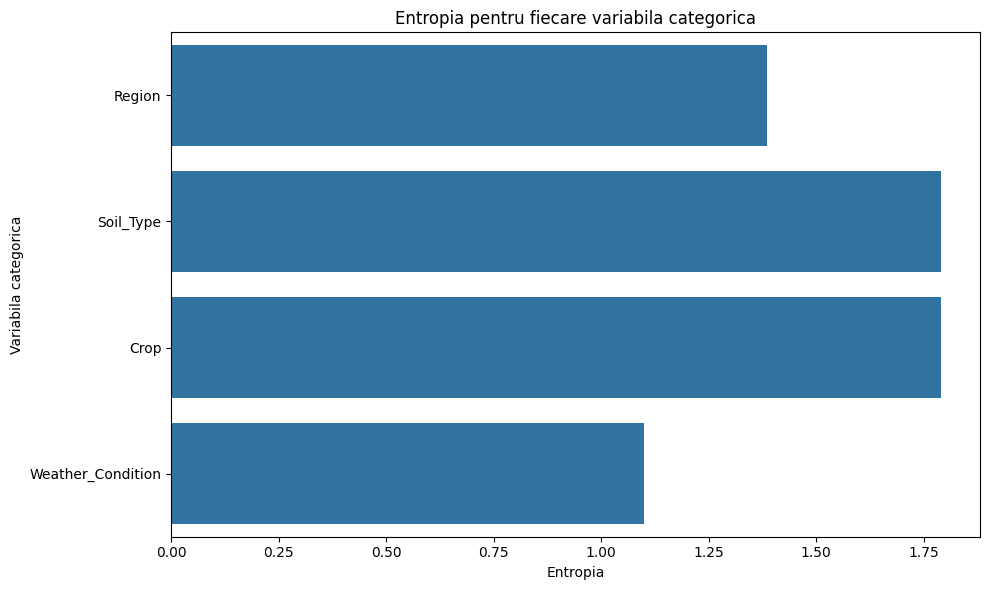

In [58]:
def calculate_entropy(data):
    probabilities = data.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log(probabilities))
    return entropy
entropy_values = {}
for column in df.columns:
    if df[column].dtype == 'object':
        entropy = calculate_entropy(df[column])
        entropy_values[column] = entropy
entropy_values
entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Column', 'Entropy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Entropy', y='Column', data=entropy_df)
plt.title('Entropia pentru fiecare variabila categorica')
plt.xlabel('Entropia')
plt.ylabel('Variabila categorica')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Împărțirea datelor în X (features) și y (target)
X = df.drop('Yield_tons_per_hectare', axis=1)  # Înlocuiește 'target_column' cu coloana țintă
y = df['Yield_tons_per_hectare']

# Transformarea coloanelor categorice în variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Împărțirea datelor în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model de regresie liniară
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicții și evaluare
y_pred = linear_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")







from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Împărțirea datelor în seturi de antrenare și testare
X = df.drop('Yield_tons_per_hectare', axis=1)  # Înlocuiește 'target_column' cu coloana țintă
y = df['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model de regresie liniară
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicții și evaluare
y_pred = linear_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

TypeError: got an unexpected keyword argument 'squared'